<a href="https://colab.research.google.com/github/WTFjarux/Concepts-and-Technologies-of-AI/blob/main/2438454_Suraj_Pandey_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
#include necessary library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [43]:
#reading the  csv files
df = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI/Coursework/reg.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,pH
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,3.51
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,0.68,9.8,3.20
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,0.65,9.8,3.26
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,0.58,9.8,3.16
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,3.51


In [44]:
#displays the name of columns in dataset
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol', 'pH'],
      dtype='object')

In [45]:
#check whether there is null value or not
df.isnull().sum()


,0
fixed acidity,0
volatile acidity,5
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
sulphates,5
alcohol,0


In [46]:
#check if there is duplicated value or not
df.duplicated().sum()

124

In [47]:
#shows the number of rows and columns in the dataset
df.shape

(1143, 11)

In [48]:
#drop the rows in which null data belongs
df.dropna(inplace= True, axis = 0);
#drop the duplicated rows
df.drop_duplicates(inplace = True)
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
sulphates,0
alcohol,0


In [49]:
#rechecking if there is any duplicated data after dropping
df.duplicated().sum()

0

In [50]:
#gives the number of rows and columns in dataset
df.shape

(1009, 11)

In [51]:
#gives the mathematical descriptions of the columns
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,pH
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,8.300496,0.533266,0.269465,2.528295,0.087179,15.604063,46.373142,0.996711,0.656650,10.449554,3.310614
std,1.737994,0.183391,0.196171,1.319861,0.048462,10.194418,33.204226,0.001916,0.167779,1.095298,0.157572
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,0.330000,8.400000,2.740000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,0.550000,9.500000,3.210000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,38.000000,0.996680,0.620000,10.200000,3.310000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997850,0.720000,11.200000,3.400000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,2.000000,14.900000,4.010000


In [52]:
#shows detail info of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1009 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1009 non-null   float64
 1   volatile acidity      1009 non-null   float64
 2   citric acid           1009 non-null   float64
 3   residual sugar        1009 non-null   float64
 4   chlorides             1009 non-null   float64
 5   free sulfur dioxide   1009 non-null   float64
 6   total sulfur dioxide  1009 non-null   float64
 7   density               1009 non-null   float64
 8   sulphates             1009 non-null   float64
 9   alcohol               1009 non-null   float64
 10  pH                    1009 non-null   float64
dtypes: float64(11)
memory usage: 94.6 KB


Visualization

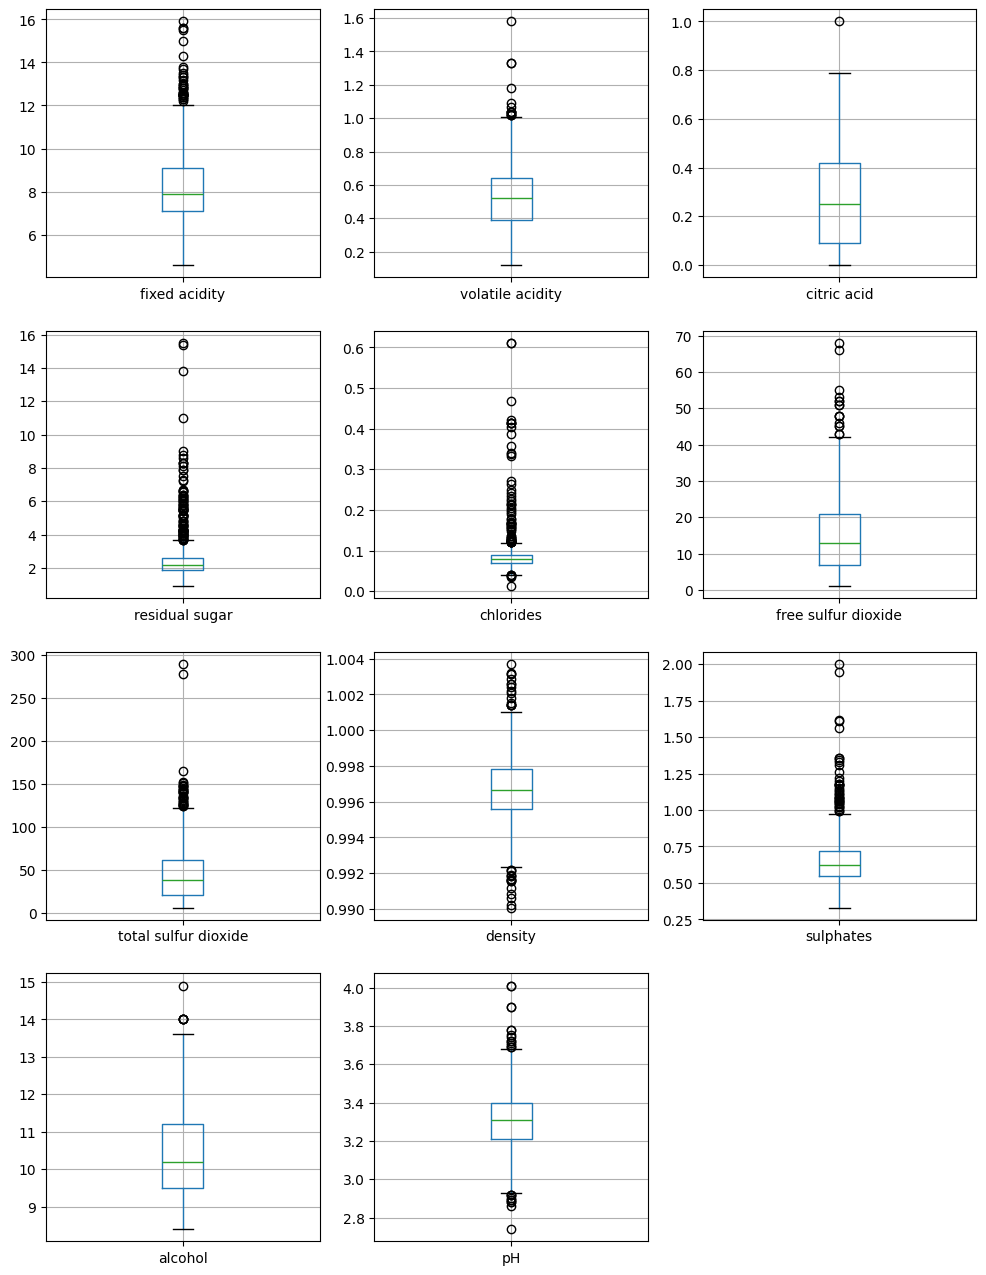

In [53]:
#plotting the box plot to find whether there are outliers or not
plt.figure(figsize=(12,16))
i=1
for col in df.columns:
    plt.subplot(4,3,i)
    df[[col]].boxplot()
    i+=1

The figure above is a box plot. The box plot here is used to find if there are any outliers present in the dataset. From the above figure we can clearly see that the columns almost every column got outliers. The presence of outliers may reduce the performance, so it is good to remove them, which is done below:

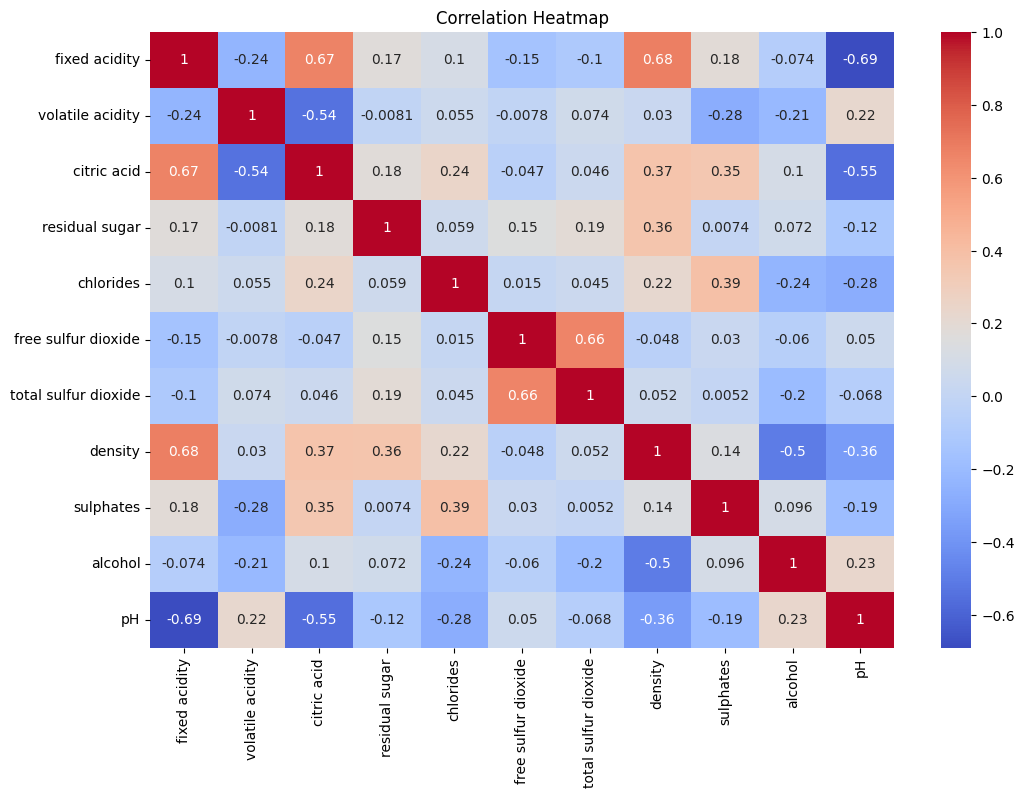

In [54]:
# Correlation heatmap before handling outliers
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [55]:
#remove the outlier  of 'fixed acidity' column using IQR method
data1 = ['fixed acidity']
for col in data1:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    df[col] = np.where(df[col]>upper_limit,upper_limit ,
                      np.where(df[col]<lower_limit,lower_limit, df[col]))

#remove the outlier  of 'volatile acidity' column using IQR method
data2 = ['volatile acidity']
for col in data2:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    df[col] = np.where(df[col]>upper_limit,upper_limit ,
                      np.where(df[col]<lower_limit,lower_limit, df[col]))

#remove the outlier  of 'residual sugar' column using IQR method
data3 = ['residual sugar']
for col in data3:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    df[col] = np.where(df[col]>upper_limit,upper_limit ,
                      np.where(df[col]<lower_limit,lower_limit, df[col]))



In [56]:
#remove the outlier  of 'chlorides' column using IQR method
data4 = ['chlorides']
for col in data4:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    df[col] = np.where(df[col]>upper_limit,upper_limit ,
                      np.where(df[col]<lower_limit,lower_limit, df[col]))

#remove the outlier  of 'density' column using IQR method
data5 = ['density']
for col in data5:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    df[col] = np.where(df[col]>upper_limit,upper_limit ,
                      np.where(df[col]<lower_limit,lower_limit, df[col]))

#remove the outlier  of 'sulphates' column using IQR method
data6 = ['sulphates']
for col in data6:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    df[col] = np.where(df[col]>upper_limit,upper_limit ,
                      np.where(df[col]<lower_limit,lower_limit, df[col]))

#remove the outlier  of 'pH' column using IQR method
data7 = ['pH']
for col in data7:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    df[col] = np.where(df[col]>upper_limit,upper_limit ,
                      np.where(df[col]<lower_limit,lower_limit, df[col]))

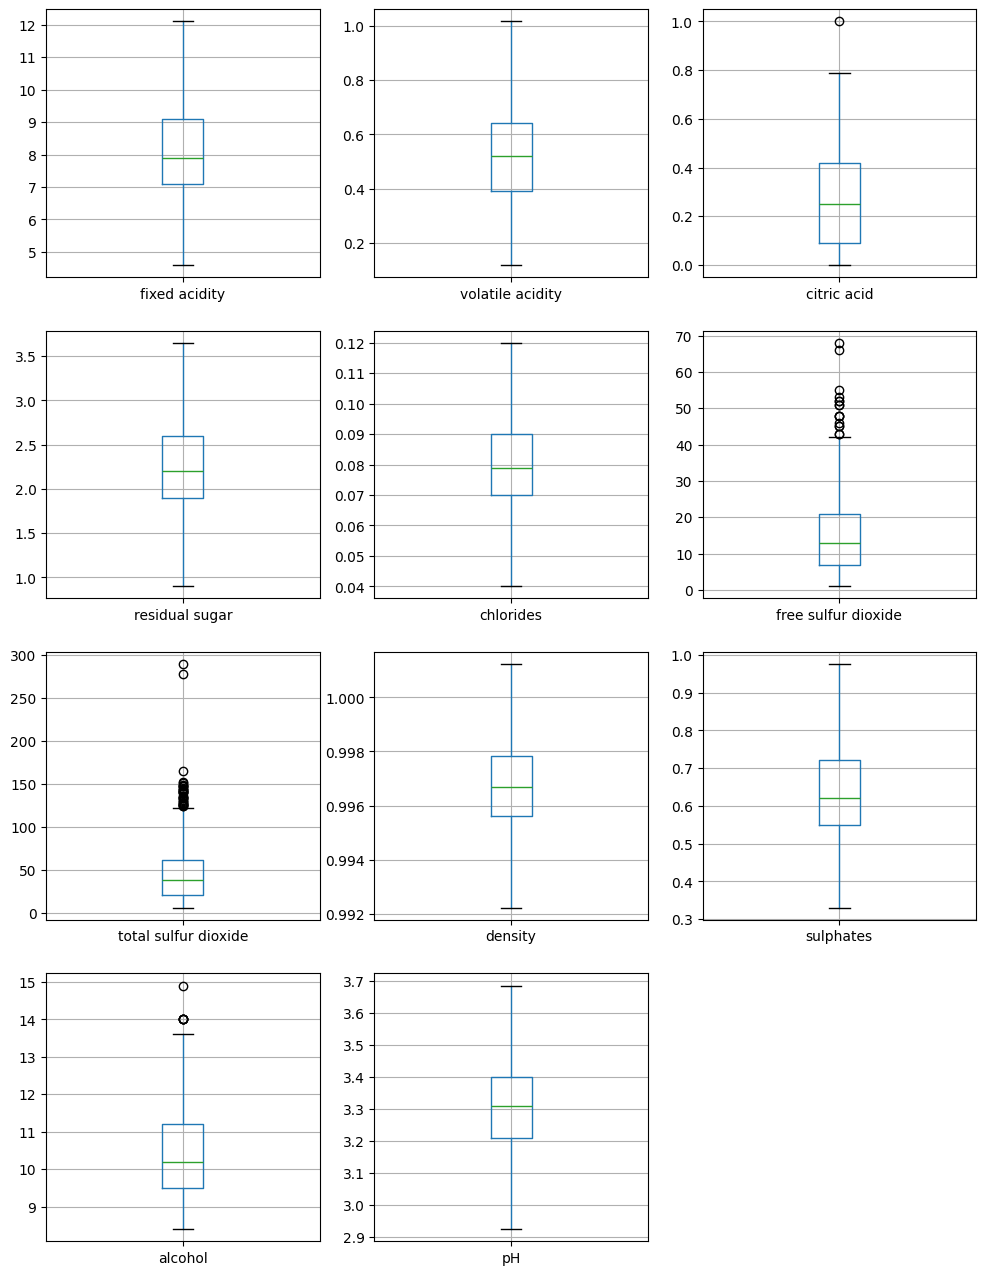

In [57]:
## After handling outliers
# Detecting outliers
plt.figure(figsize=(12,16))
i=1
for col in df.columns:
    plt.subplot(4,3,i)
    df[[col]].boxplot()
    i+=1

In [58]:
#shows the corelation coefficient between the columns
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,pH
fixed acidity,1.000000,-0.247618,0.675134,0.243473,0.241103,-0.151799,-0.103129,0.682260,0.213558,-0.091966,-0.700268
volatile acidity,-0.247618,1.000000,-0.547533,0.020450,0.144888,-0.000303,0.083517,0.027689,-0.338696,-0.218021,0.221577
citric acid,0.675134,-0.547533,1.000000,0.220629,0.159539,-0.047344,0.045755,0.375278,0.359688,0.101673,-0.556358
residual sugar,0.243473,0.020450,0.220629,1.000000,0.202626,0.077932,0.146539,0.419416,0.019529,0.121704,-0.118314
chlorides,0.241103,0.144888,0.159539,0.202626,1.000000,0.010227,0.082135,0.429361,0.089874,-0.338932,-0.266225
free sulfur dioxide,-0.151799,-0.000303,-0.047344,0.077932,0.010227,1.000000,0.662197,-0.046688,0.009580,-0.059731,0.052434
total sulfur dioxide,-0.103129,0.083517,0.045755,0.146539,0.082135,0.662197,1.000000,0.058950,-0.049262,-0.196540,-0.071562
density,0.682260,0.027689,0.375278,0.419416,0.429361,-0.046688,0.058950,1.000000,0.147380,-0.506719,-0.353356
sulphates,0.213558,-0.338696,0.359688,0.019529,0.089874,0.009580,-0.049262,0.147380,1.000000,0.171430,-0.128011
alcohol,-0.091966,-0.218021,0.101673,0.121704,-0.338932,-0.059731,-0.196540,-0.506719,0.171430,1.000000,0.216342


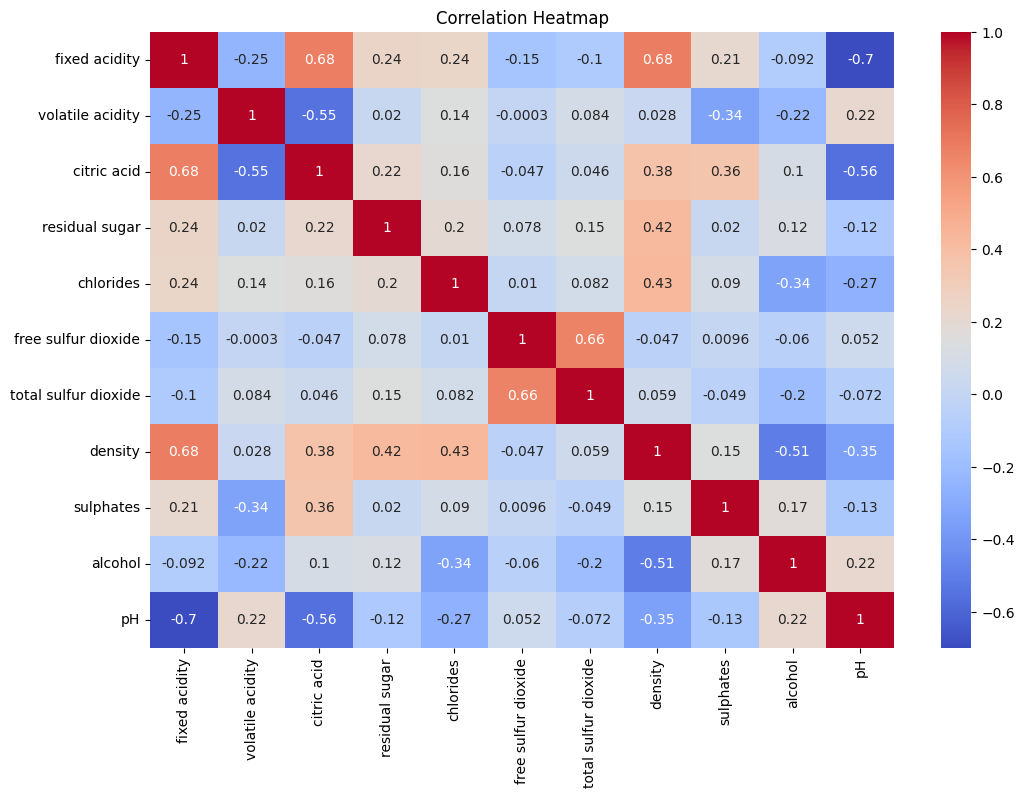

In [59]:
# Correlation heatmap after handling outliers
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


The figure above is a heatmap that shows the correlation coefficient between the columns in the dataset . Here it is clear that the columns 'fixed_acidity','citric acid','residual sugar','chlorides' ,'density' and 'sulphates' have a good negative correlation with the pH column while columns like 'alcohol','volatile acidity' have a good negative correlation with the pH column while other have a very minimal correlation with pH column. This shows the best features that can be used

Train-Test Split

In [60]:
from sklearn.model_selection import train_test_split

I have used a feature selection method based on correlation analysis done above, before splitting the data into training and testing sets. At first I have identified features that have a high correlation coefficient with the target column (either positive or negative). This suggests that these features contain redundant information. Furthermore, the features with low correlation coefficient with target column has been dropped and the features with high correlation coefficient is used for train and test

In [61]:
#differentiating features and target
X = df.drop(columns=['total sulfur dioxide','free sulfur dioxide','pH'])  # Features
y = df['pH']  # Target variable

#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,0.99780,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,0.99680,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,0.99700,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,0.99800,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...
1136,6.3,0.550,0.15,1.8,0.077,0.99314,0.82,11.6
1138,6.3,0.510,0.13,2.3,0.076,0.99574,0.75,11.0
1140,6.2,0.600,0.08,2.0,0.090,0.99490,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,0.99512,0.76,11.2


Linear Regression

In [63]:
#performing linear regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [64]:
# Make predictions on the test set
y_pred_lr= lr_model.predict(X_test)

Evaluation Metrics (Linear Regression)

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluation Metrics
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Model:")
print("Mean Squared Error:", lr_mse)
print("R-squared Score:", lr_r2)

Linear Regression Model:
Mean Squared Error: 0.006063401209569299
R-squared Score: 0.7142189320364112


HyperParameter Tuning(Linear Regression)

In [66]:
from sklearn.model_selection import GridSearchCV

# Hyper-parameter Optimization with Cross-Validation

# Identify hyperparameters for Linear Regression
lr_hyperparameters = {
    'fit_intercept': [True, False]
}

# Use GridSearchCV to find the best hyperparameters for Linear Regression
lr_grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=lr_hyperparameters, cv=5)
lr_grid_search.fit(X_train, y_train)

# Conclude: The best Hyper-parameters for both models

print("Best Hyperparameters for Linear Regression:")
print(lr_grid_search.best_params_)

Best Hyperparameters for Linear Regression:
{'fit_intercept': True}


Final Model(Linear Regression)

In [67]:
# Initialize Linear Regression model with best hyperparameters
lr_final_model = LinearRegression(fit_intercept=True)

# Train the model with selected features
lr_final_model.fit(X_train, y_train)

# Evaluate the model
lr_final_score = lr_final_model.score(X_test, y_test)
print("Linear Regression Final Model Score:", lr_final_score)

Linear Regression Final Model Score: 0.7142189320364112


Ridge

In [68]:
from sklearn.linear_model import Ridge

# Ridge Regression Model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization
ridge_model.fit(X_train, y_train)
# Predictions
ridge_predictions = ridge_model.predict(X_test)

Evaluation Metrics(Ridge)

In [69]:
# Evaluation Metrics
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

print("Ridge Regression Model:")
print("Mean Squared Error:", ridge_mse)
print("R-squared Score:", ridge_r2)

Ridge Regression Model:
Mean Squared Error: 0.00897558663026658
R-squared Score: 0.5769614043106517


HyperParameter Tuning(Ridge)

In [70]:
# Identify hyperparameters for Ridge Regression
ridge_hyperparameters = {
    'alpha': [0.1, 1.0, 10.0],
    'fit_intercept': [True, False]
}

# Use GridSearchCV to find the best hyperparameters for Ridge Regression
ridge_grid_search = GridSearchCV(estimator=Ridge(), param_grid=ridge_hyperparameters, cv=5)
ridge_grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters for Ridge Regression:")
print(ridge_grid_search.best_params_)


Best Hyperparameters for Ridge Regression:
{'alpha': 0.1, 'fit_intercept': False}


Final Model

In [71]:
# Initialize Ridge Regression model with best hyperparameters
ridge_final_model = Ridge(alpha=ridge_grid_search.best_params_['alpha'], fit_intercept=False)

# Train the model with selected features
ridge_final_model.fit(X_train, y_train)

# Evaluate the model
ridge_final_score = ridge_final_model.score(X_test, y_test)
print("Ridge Regression Final Model Score:", ridge_final_score)


Ridge Regression Final Model Score: 0.5856131661649655


1. Which model performed the best

In [72]:
if(ridge_mse<lr_mse):
  print("Ridge performs better")

else:
  print("Linear regression performs better")

Linear regression performs better


Based on the MSE values, the linear regression model has a lower MSE (0.005692) compared to the Ridge regression model (0.008119).
This means that the linear regression model makes predictions that are, on average, closer to the actual values than the Ridge regression model.
Overall concluding, the linear performs a little bit better than redge in making predictions

2. Did any of the methods you applied {Cross Validation and Feature selection} increased or
decreased.

Overall, the techniques for feature selection and cross-validation both helped to improve the performance of the model. Cross-validation helped in finding optimal hyperparameters that improved the generalization of the models. A subset of features was found through feature selection that contributed most to the predictive power of both models. Overall both methods helped to increase the performance

3. What I got to know from this experiment

From this experiment, i got to know that techniques like feature selection and cross-validation both helped to improve the performance of the model. Cross-validation helped in finding optimal hyperparameters that improved the generalization of the models. A subset of features was found through feature selection that contributed most to the predictive power of both models.